In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import wumpus_world as ww
import matplotlib.pyplot as plt
from time import sleep

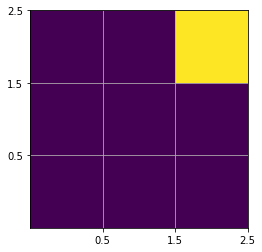

In [2]:
agent = ww.agent(3,3,0,0,0)
agent.plot_map()

In [ ]:
agent.interactive_game()

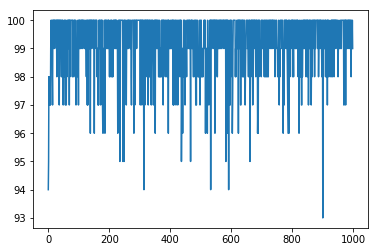

In [4]:
Q_MC, C_MC, G_log_MC, pi_MC=agent.off_policy_MC_control(1000)
plt.plot(G_log_MC)

In [10]:
pi_MC[:,:,0]

array([[2, 1, 2],
       [0, 3, 0],
       [0, 1, 0]], dtype=int64)

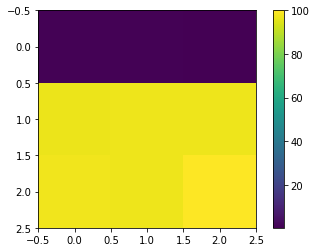

In [6]:
plt.imshow(Q_MC[:,:,0,0])
plt.colorbar()

In [7]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = np.int16(pi_MC[s])
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r, 1.0/4))
    if r in (ww.REWARD_DEATH, ww.REWARD_WIN):
        break

-1


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Programs\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-322ad6b3b4f3>", line 9, in <module>
    agent.debug(str(r))
  File "C:\Users\mamin\GitHub\RLBookSolutions\RL Examples\2. wumpus world\wumpus_world.py", line 55, in debug
    clear_output(wait=True)
  File "D:\Programs\anaconda3\envs\tf\lib\site-packages\IPython\core\display.py", line 1403, in clear_output
    InteractiveShell.instance().display_pub.clear_output(wait)
  File "D:\Programs\anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 157, in clear_output
    self._flush_streams()
  File "D:\Programs\anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 79, in _flush_streams
    sys.stdout.flush()
  File "D:\Programs\anaconda3\envs\tf\lib\site-packages\ipykernel\iostream.py", line 349, in flush
    if not evt.wait(self.flush_timeout):


KeyboardInterrupt: 

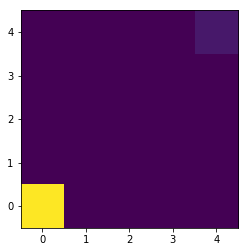

In [75]:
mp = world.map.copy()
for e in episode:
    mp[e[:2]] = 80
plt.imshow(mp)
plt.gca().invert_yaxis()

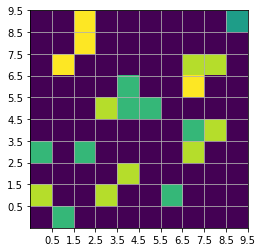

In [47]:
world = ww.WumpusWorld(10,10,4,8,8)
world.plot_map()

In [12]:
Q_sarsa, G_log_sarsa = agent.sarsa_control(500, epsilon=0.5, alpha=0.8)

0.998


In [15]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = agent.epsilon_greedy(Q_sarsa, s, agent.num_action, 0)
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r))
    if r in (ww.REWARD_WIN, ww.REWARD_DEATH):
        break

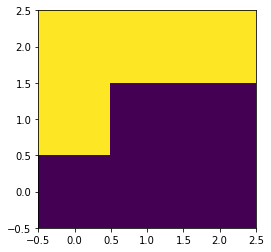

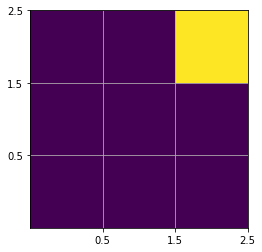

In [16]:
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
plt.imshow(mp)
plt.gca().invert_yaxis()
agent.plot_map()

In [18]:
Q_q_learning, G_log_q_learning = agent.Q_learning_control(500, epsilon=0.5, alpha=0.8)

0.998


In [19]:
# first state (random)
s = (0, 0, 0)
# a log list for episode
episode = list()

while True:
    a = agent.epsilon_greedy(Q_q_learning, s, agent.num_action, 0)
    s, r = agent.deterministic_move(s[:-1], a)
    episode.append(s + ( a, r))
    if r in (ww.REWARD_DEATH, ww.REWARD_WIN):
        break

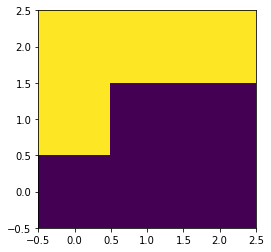

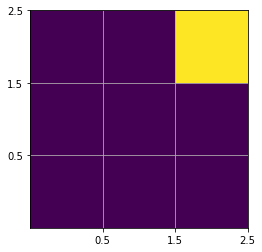

In [21]:
mp = agent.map.copy()
for e in episode:
    mp[e[:2]] = 80
    
plt.imshow(mp)
plt.gca().invert_yaxis()
agent.plot_map()

In [ ]:
plt.figure()
plt.plot(G_log_sarsa, label = 'sarsa')
plt.plot(G_log_q_learning, label= 'Q_learning')
# plt.ylim((-200,100))
plt.legend()